In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

### load the model

In [3]:
path = "data/wiki/"

In [26]:
wiki_data_old = load_data(path, 'wiki_data_old.pkl')

In [5]:
learn_generate = language_model_learner(wiki_data_old, AWD_LSTM)
learn_generate.load("heb_model_save_2")

### change the vocab

In [7]:
bad_char = " ".join("אבגדהוזחטיכלמנסעפצקרשתךףךןabcdefghijklmnopqrstuvwxyz").split(" ")
for char in bad_char:
    if learn_generate.data.vocab.stoi.get(char, False):
        learn_generate.data.vocab.stoi[char] = 0

In [8]:
learn_generate.save("heb_model_save_3")

### re-load the wiki data

In [9]:
# load all the text file inside the directory
src = TextList.from_folder(path, vocab=learn_generate.data.vocab).random_split_by_pct(0.1).label_for_lm(ignore_empty=True)
wiki_data = src.databunch(bs=48)

In [10]:
wiki_data.save("wiki_data.pkl")

### create final model

In [34]:
gc.collect()

446

In [4]:
wiki_data = load_data(path, "wiki_data.pkl")

In [5]:
# create the model from the data
learn_generate = language_model_learner(wiki_data, AWD_LSTM, pretrained="heb_model_save_3")

In [13]:
learn_generate.data.show_batch()

idx,text
0,"והקבוצה . \n ניתן למצוא xxunk של הרעיונות הבסיסיים בטקסטים המתמטיים xxunk המצרים , הבבלים , ההודים , הסינים , היוונים והמוסלמים . \n כבר בשלב מוקדם בלטו שלושה מאפיינים המלווים את המתמטיקה עד היום : . \n הפשטה : אף שמקורם של חלק מן העצמים המתמטיים בעולם הממשי , הדיון המתמטי בהם כרוך xxunk ניכרת . \n המספר 5 עשוי לייצג 5 אבנים או 5"
1,"הציבור הרחב . \n חברת xxunk , xxunk לסיום הפרויקט xxunk עיניים , בעודה רואה כיצד הדפדפן הקודם שלה הולך ומאבד את אחיזתו בשוק , הוציאה את גרסה xxunk של הדפדפן שלה על בסיס אחת הגרסאות המוקדמות ( xxmaj xxunk 18 ) . \n היא ספגה ביקורת קשה על כך , משום xxunk ירש xxunk באגים רבים , xxunk רק מאוחר יותר , וגרם לה בכך נזק xxunk"
2,"התחום נמצא במרכז העיסוק של ענף חקר ביצועים במתמטיקה xxunk . \n הקביעה איזה ערך נחשב xxunk , תלויה בתנאי הבעיה . \n בבעיות מסוימות ערך אופטימלי הינו ערך מקסימלי של הפונקציה תחת ההגבלות xxunk , xxunk אחרות זהו הערך המינימלי . \n הקושי במציאת הערך האופטימלי תלוי בפונקציה המבוקשת ובתחום בו יש לבצע אופטימיזציה . \n בעיות אופטימיזציה מסוימות הן xxup np קשות , בעוד"
3,"מתחילת שנות התשעים הגיעו xxunk למעלה xxunk - 800 משפחות עולים , רובן מחבר העמים לשעבר . \n יהוד - מונוסון מונה כיום xxunk תושבים xxunk משקי בית . \n העיר עברה התרחבות ניכרת עם הקמתה של שכונת קריית xxunk היוקרתית בשנים 1992 - 1995 , אשר קדמו xxunk השכונות קריית ביאליסטוק , גבעת xxunk xxunk עובד , בעלות אוכלוסייה סוציו - xxunk גבוהה אשר שינו את אופיה"
4,"לאחר פרסומו הראשוני של תבורי , הפך השיר "" הלנה "" ללהיט . \n ההתקדמות המשמעותית בקריירה של תבורי החלה לאחר שדוד חלפון שמע אותו , בחתונה שבה הופיע , מבצע את השיר "" אשליות "" , שאותו כתב חלפון xxunk סרוסי . \n חלפון xxunk בין תבורי לבין עוזי חיטמן , שעשה את צעדיו הראשונים ככותב xxunk לאחר שחרורו מצה""ל . \n בשנת 1976 הוליד שיתוף"


### train the model

In [6]:
learn_generate.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


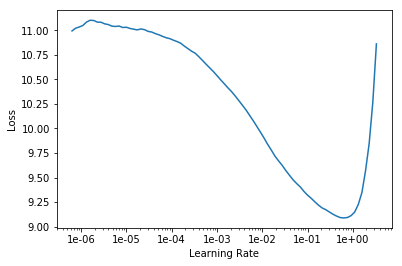

In [15]:
learn_generate.lr_find()
learn_generate.recorder.plot()

In [7]:
learn_generate.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

In [8]:
learn_generate.save("heb_model_save_4")

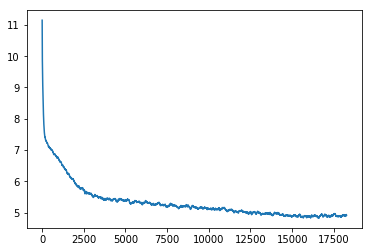

In [25]:
# learn_generate.recorder.plot_losses()
plt.plot(range(len(learn_generate.recorder.losses)), learn_generate.recorder.losses, "-")
plt.show()

##  results

the result seem very promising! <br>
whithout touch the data at all, and with 3 epoch, we achive very Reasonable results.

In [20]:
TEXT = "כאשר הגיע"
N_WORDS = 40
N_SENTENCES = 1
print("\n".join(learn_generate.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

כאשר הגיע עד למזרח אירופה , טקטיקה זו הייתה המובילה בהיסטוריה . 
  בין טירות שפירוש זה היה ידידו של הפתרון , זאב ובין השאר ( למשל : שפירושו מגן בעל נפש ) , בעוד לתופעה יש שתי דרכים חדשות באשר לכל


## export model

In [4]:
wiki_data = load_data(path, 'wiki_data.pkl')

In [5]:
learn_generate = language_model_learner(wiki_data, AWD_LSTM)
learn_generate.load("heb_model_save_4")

In [7]:
learn_generate.export("wiki-heb.pkl")